# Thera Bank Personal Loan Campaign

## Data Description:

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## Domain:
Banking

## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

## Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (\\$1,000)
- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month (\\$1,000)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (\\$1,000)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

## Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation

## Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Steps and tasks:
-  Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
- EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
    - Number of unique in each column?
    - Number of people with zero mortgage?
    - Number of people with zero credit card spending per month?
    - Value counts of all categorical columns.
    - Univariate and Bivariate
    - Get data model ready
- Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
- Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
- Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
- Give conclusion related to the Business understanding of your model? (5 marks)

# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

### Import Libraries

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import metrics

### Import Dataset

In [68]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv');
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Check Data Types

In [69]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### Check Statistical Summary

In [70]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Check Shape

In [71]:
data.shape

(5000, 14)

### Check Null Values

In [72]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
1. Number of unique in each column?
1. Number of people with zero mortgage?
1. Number of people with zero credit card spending per month?
1. Value counts of all categorical columns.
1. Univariate and Bivariate
1. Get data model ready

### Unique Values

In [73]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

**Insights**:
- The columns Personal Loan, Securities Account, CD Account, Online, and CreditCard appear to be categorical as they are either 0 or 1 (yes or no).
- ID seems insignificant and should be dropped. 

### No Mortgage

In [74]:
data[data['Mortgage'] == 0].shape[0]

3462

**Insights**: A significant majority of customers in this data set do not have a mortgage.

### No Monthly Credit Card Spending

In [75]:
data[data['CCAvg'] == 0].shape[0]

106

**Insights**: Nearly all of the customers in this dataset use a credit card. This also begs the question: What's the difference between CCAvg and CreditCard?

### CCAvg vs CreditCard

In [76]:
data[data['CCAvg'] > 0][['CCAvg', 'CreditCard']]

,CCAvg,CreditCard
0,1.6,0
1,1.5,0
2,1.0,0
3,2.7,0
4,1.0,1
...,...,...
4995,1.9,0
4996,0.4,0
4997,0.3,0
4998,0.5,0


**Insights**: This seems counter-intuitive, as one would assume that if a customer doesn't have a credit card (CreditCard column = 0), they shouldn't have a value in the CCAvg column. However, this clearly points out that the CreditCard column solely refers to whether the customer has a credit card issued by the bank. CCAvg indicates if they have a credit card from any other institution, not necessarily the bank's own credit card. 

### Value Counts of Categorical Columns

In [77]:
for col in data.loc[:, 'Personal Loan':]:
    print(data[col].value_counts(normalize=True))
    print()

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64



### Univariate Analysis

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [79]:
data_si = data.drop(['ID'], axis=1) # data sans id
data_si.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


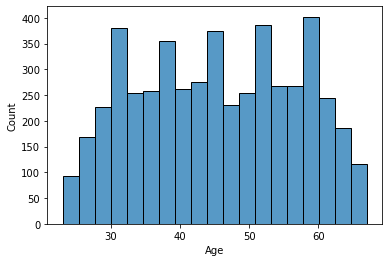

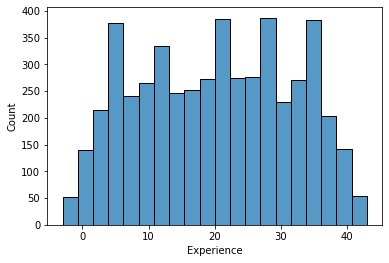

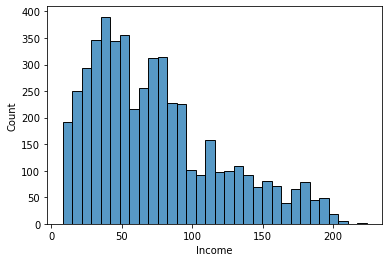

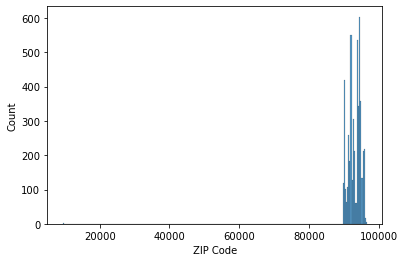

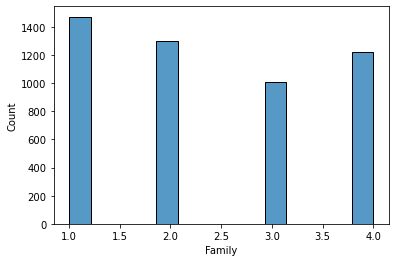

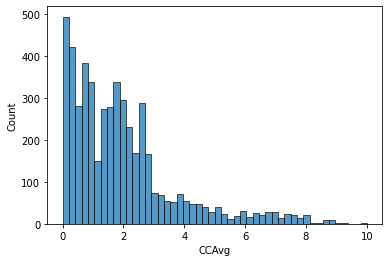

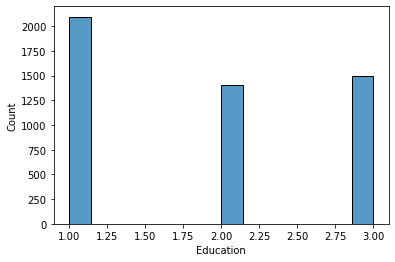

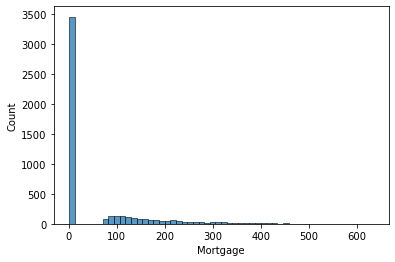

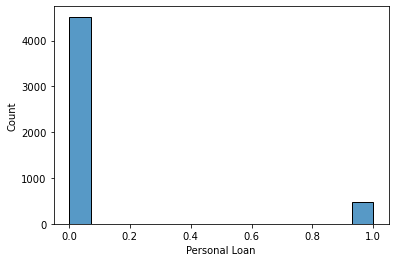

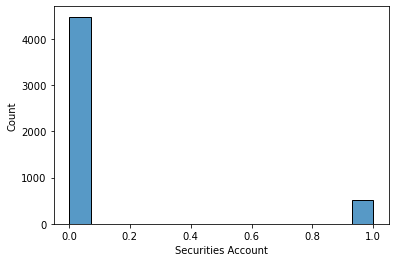

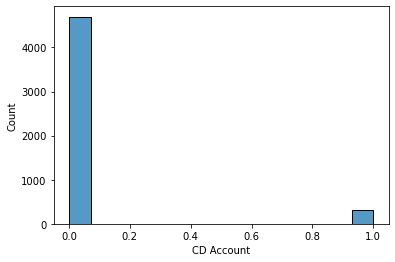

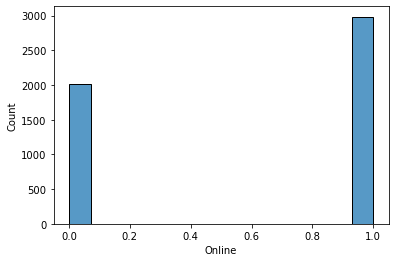

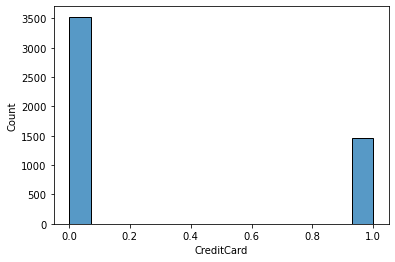

In [11]:
for col in data_si.columns:
    sns.histplot(data_si[col])
    plt.show()

**Insights**: Based on the histogram visualizations, the ZIP Code column stands out to me. Further analysis is needed. 

### ZIP Code Analysis

In [80]:
data_si['ZIP Code'].nunique()

467

**Insights**: 467 unique ZIP Codes. 

In [81]:
zip_unique = pd.DataFrame(data_si['ZIP Code'].unique())
zip_unique.rename(columns = {0:'Unique ZIP Codes'},  
            inplace = True) 
zip_unique

,Unique ZIP Codes
0,91107
1,90089
2,94720
3,94112
4,91330
...,...
462,90068
463,94970
464,90813
465,94404


In [82]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True) # set simple_zipcode=False to use rich info database
for zip in zip_unique['Unique ZIP Codes']:
    zipcode = search.by_zipcode(zip)
    if zipcode.major_city == None:
        print(zip)
        print(zipcode)
        print()

92717
SimpleZipcode(zipcode=None, zipcode_type=None, major_city=None, post_office_city=None, common_city_list=None, county=None, state=None, lat=None, lng=None, timezone=None, radius_in_miles=None, area_code_list=None, population=None, population_density=None, land_area_in_sqmi=None, water_area_in_sqmi=None, housing_units=None, occupied_housing_units=None, median_home_value=None, median_household_income=None, bounds_west=None, bounds_east=None, bounds_north=None, bounds_south=None)

9307
SimpleZipcode(zipcode=None, zipcode_type=None, major_city=None, post_office_city=None, common_city_list=None, county=None, state=None, lat=None, lng=None, timezone=None, radius_in_miles=None, area_code_list=None, population=None, population_density=None, land_area_in_sqmi=None, water_area_in_sqmi=None, housing_units=None, occupied_housing_units=None, median_home_value=None, median_household_income=None, bounds_west=None, bounds_east=None, bounds_north=None, bounds_south=None)

92634
SimpleZipcode(zipco

**Insights**: These 4 ZIP Codes do not exist. Additionally, one seems to be missing a digit. How many customers have these ZIP Codes?

In [83]:
zip_dne = [] # ZIP Code does not exist
for idx, z in enumerate(data_si['ZIP Code']):
    if z == 92717 or z == 9307 or z == 92634 or z == 96651:
#         print(idx)
        zip_dne.append(idx)

len(zip_dne)

34

**Insights**: 34 customers are listed with the incorrect/non-existent ZIP Codes. 

### Bivariate Analysis

In [84]:
data_si.loc[:,'Age':'Personal Loan'].groupby(['Personal Loan']).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage
Personal Loan,,,,,,,,
0,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833


In [85]:
data_si.loc[:,'Age':'Personal Loan'].groupby(['Personal Loan']).median()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage
Personal Loan,,,,,,,,
0,45.0,20.0,59.0,93437.0,2.0,1.4,2.0,0.0
1,45.0,20.0,142.5,93407.0,3.0,3.8,2.0,0.0


**Insights**: 
- Analysing without Securities Account, CD Account, Online, CreditCard columns as it gives averages of 0 and 1. 
- The mean and median of the ZIP Code columns seems insignificant. 
- The most significant columns seems to be income and average credit card use

In [86]:
pd.crosstab(data_si['CreditCard'],data_si['Personal Loan'],normalize='columns')

Personal Loan,0,1
CreditCard,,
0,0.706416,0.702083
1,0.293584,0.297917


**Insights**: The lack of a credit card seems to have a significant impact on both the likelihood of getting and not getting a personal loan. 

In [87]:
pd.crosstab(data_si['Education'],data_si['Personal Loan'],normalize='columns')

Personal Loan,0,1
Education,,
1,0.443142,0.193750
2,0.270133,0.379167
3,0.286726,0.427083


**Insights**:
- Customers with an undergraduate degree seemed to not get a personal loan.
- Those with higher degrees seem to get a personal loan. 

### Get Data Model Ready

In [88]:
X = data_si.drop(['Personal Loan','ZIP Code'], axis=1)
y = data_si['Personal Loan']

**Insights**: Dropping ZIP Code column based on:
1. the large spread pictured in the histogram
2. the errors found within the column
3. the insignificance of the mean and median.

I will follow up and rebuild the model with ZIP Code, and compare the model with and without ZIP Code. 

# 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=88)

# 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [90]:
loreg_model = LogisticRegression(solver='liblinear',random_state=20210113)
# solver - algorithm used in optimization problem; liblinear used for small dataset
# random_state - used with solver=liblinear to shuffle data
loreg_model.fit(X_train, y_train)
y_predict = loreg_model.predict(X_test)

### Training Accuracy

In [91]:
train_score = loreg_model.score(X_test, y_test)
train_score

0.9533333333333334

### Test Accuracy

In [92]:
test_score = loreg_model.score(X_train, y_train)
test_score

0.9502857142857143

### Recall Score

In [93]:
metrics.recall_score(y_test,y_predict)

0.6206896551724138

### Precision

In [94]:
metrics.precision_score(y_test, y_predict)

0.8571428571428571

### F1 Score

In [95]:
metrics.f1_score(y_test,y_predict)

0.7200000000000001

### ROC AUC Score

In [96]:
metrics.roc_auc_score(y_test,y_predict)

0.8048097722356533

### Confusion Matrix

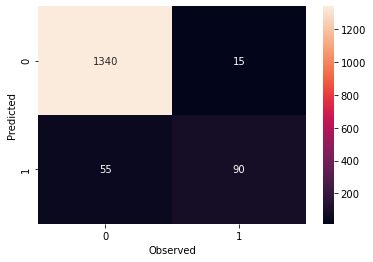

In [97]:
conf_mat = metrics.confusion_matrix(y_test, y_predict)
conf_mat
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.show()

# 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

### Coefficients

In [98]:
coef = pd.DataFrame()
coef['Columns'] = X_train.columns
coef['Coefficients'] = np.round(abs(loreg_model.coef_[0]),2)
coef.sort_values(by='Coefficients',ascending=False)

,Columns,Coefficients
8,CD Account,3.56
5,Education,1.79
10,CreditCard,1.13
7,Securities Account,0.86
3,Family,0.61
9,Online,0.53
1,Experience,0.43
0,Age,0.42
4,CCAvg,0.10
2,Income,0.05


### Predicted Class Not Equal to the Observed Class

In [99]:
data_ovp = X_test.copy() # data observed vs predicted
data_ovp['Observed Personal Loan'] = y_test
data_ovp['Predicted Personal Loan'] = y_predict
data_ovp[data_ovp['Observed Personal Loan'] != data_ovp['Predicted Personal Loan']]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Personal Loan,Predicted Personal Loan
3651,49,23,140,1,1.90,3,0,0,0,0,1,1,0
1069,44,18,75,2,3.50,1,0,0,0,1,0,1,0
4993,45,21,218,2,6.67,1,0,0,0,1,0,0,1
2784,36,9,115,4,2.20,2,0,0,0,0,0,1,0
2262,55,29,131,2,0.70,2,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,54,30,121,2,1.10,3,0,1,0,0,0,1,0
3517,30,6,95,1,3.90,3,146,0,0,0,1,1,0
1062,47,21,83,1,3.80,1,97,0,0,0,0,1,0
528,64,39,122,4,0.20,1,378,0,0,1,0,1,0


**Insights**: 
- The model was not able to accurately predict whether a customer purchased a loan on 70 rows - the observed value did not match the predicted value. 
- This is the sum of the False Positive and False Negative values. 

# 6. Give conclusion related to the Business understanding of your model? (5 marks)

### Confusion Matrix Definitions

**True Positive**: Model predicted that the customer would purchase a personal loan, and the customer had purchased a personal loan. 

**False Positive**: Model predicted that the customer would purchase a personal loan, but the customer had *not* purchased a personal loan. 

**False Negative**: Model predicted that the customer would *not* purchase a personal loan, and the customer had purchased a personal loan. 

**True Negative**: Model predicted that the customer would *not* purchase a personal loan, and the customer had in fact *not* purchased a personal loan. 

### Significant Data Points

CD Account (3.56), Education (1.79), and Credit Card (1.13) were the top three most significant data points as they had the largest coefficients, which means they had the largest impact on the model's output. 

Income, which one may have assumed to be one the most significant data point, was in fact one of the least significant as it had a coeffcient of 0.5. CCAvg followed Income in terms of least significance with a coeffcient of 0.10. Mortage was the least significant data point. It had a 0 coeffcient, meaning it had absolutely no influence on the model's output.

These three coming in last was surprising, and almost counter-intuitive, as one would assume how much money a customer makes, whether they own a home, and how much they spend would be good indicators of whether they would get a personal loan. However, it turns out that the best indicator of whether a customer is likely to purchase a future product (Personal Loan) is if a customer already has an existing product (CD Account). 

### Regarding the ZIP Code Column

When the model was rebuilt including the ZIP Code column, all metrics worsened. The coefficients were significantly impacted and the False Positive rate increased. Several methods were tried: 1) using the ZIP Code column as is, 2) removing only the row with the missing digit, and 3) removing all 34 rows with the incorrect ZIP code. In each instance, the metrics were worse than simply removing the column. As such, the ZIP Code column was not used in the final model. 

### Most Important Metric

In this case study, the bank is looking to devise campaigns with better target marketing with the goal of converting liability customers to personal loan customers with a minimal budget. 

The key phrase here is "minimal budget". The bank needs to get the most out of it's budget and target only those customer that are more likely to buy a loan, versus spending resources (time and money) on trying to sell a loan to a customer that is not likely to purchase a loan. 

As such, we need to ensure a low False Positive to make sure we are not targeting customers that are not likely to purchase a personal loan. Since Precision is calculated as TP / TP + FP, Precision is the most important metric.